In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

import warnings
from sklearn.exceptions import DataConversionWarning

In [29]:
data=pd.read_csv('/content/cars_dataset.csv')
data.head(3)

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc


In [31]:
x = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

x_pd=pd.DataFrame(x)

print("x:",x.shape , "y:",y.shape)

x: (1728, 6) y: (1728,)


In [32]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
x[:,2] = le.fit_transform(x[:,2])
x[:,3] = le.fit_transform(x[:,3])
x[:,4] = le.fit_transform(x[:,4])
x[:,5] = le.fit_transform(x[:,5])

y = le.fit_transform(y)

print("x:",x.shape , "y:",y.shape)

x: (1728, 6) y: (1728,)


In [33]:
y = y.reshape(-1,1)
y.shape

(1728, 1)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test =train_test_split(x,y,test_size=0.2)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (1382, 6)
x_test: (346, 6)
y_train: (1382, 1)
y_test: (346, 1)


In [35]:
from sklearn.metrics import accuracy_score
kernels={'linear':"linear",
         'poly':"poly",
         'sigmoid':"sigmoid"}

svc_models={}

for i in kernels.keys():
  svc_models[f"svc_{i}"] = SVC(kernel=i)
            #keys            #values
  svc_models[f"svc_{i}"].fit(x_train, y_train)




for j in svc_models.keys():
  model_pre = svc_models[j].predict(x_test)
  svc_models[j].accuracy=accuracy_score(y_test,model_pre)

  print(f"svc_model{j}" , svc_models[j].accuracy)

svc_modelsvc_linear 0.7716763005780347
svc_modelsvc_poly 0.838150289017341
svc_modelsvc_sigmoid 0.5404624277456648


poly gives the best accuracy. So move on it

In [36]:
poly = {}

for i in range (1,5):
  poly[f"scv_{i}"]=SVC(kernel='poly',degree=i)
  poly[f"scv_{i}"].fit(x_train,y_train)

pre = []

for j in poly.keys():
  model_pre_2 = poly[j].predict(x_test)
  pre.append(model_pre_2)
  poly[j].accuracy = accuracy_score(y_test,model_pre_2)
  print(f"svc_{j}" , poly[j].accuracy)


warnings.filterwarnings("ignore", category=DataConversionWarning)

svc_scv_1 0.7543352601156069
svc_scv_2 0.7745664739884393
svc_scv_3 0.838150289017341
svc_scv_4 0.8757225433526011


In [37]:
print(poly['scv_4'].accuracy)

0.8757225433526011


In [38]:
print(len(pre))

4


<Axes: >

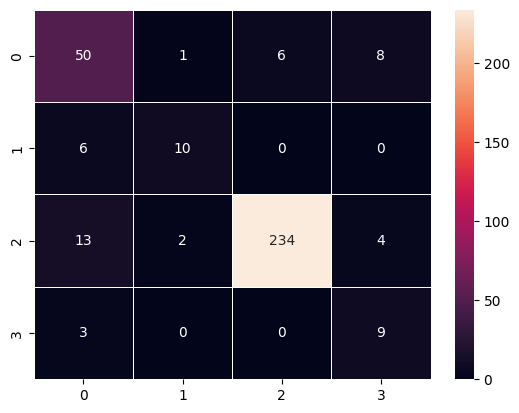

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test , pre[3])
sns.heatmap(cm,annot=True,fmt="d",linecolor="white",linewidth=.5)

Lets use grid search

In [40]:
from sklearn.model_selection import GridSearchCV
model = SVC()

grid_params = {"kernel":["linear","poly","sigmoid"] , "degree":[1,2,3,4]}
gridsearch = GridSearchCV(model,grid_params,scoring='accuracy',cv=5)
gridsearch.fit(x_train,y_train)

print(gridsearch.best_params_ , gridsearch.best_score_)


warnings.filterwarnings("ignore", category=DataConversionWarning)

{'degree': 4, 'kernel': 'poly'} 0.9073562496729973
